# Overview

In this assignment, you will examine how to use regressions to analyze data.  In particular, you will approach several problems using two data sets.    You will use regression analysis to build models to conduct predictions. 

For this assignment, you will need to include markup and code cells in this notebook so that you can address questions based on the plots generated from the different problems. You must put plots created by your code in the notebook. Even if you believe your plots are wrong, answer the question according to your plots/code, and you can include an explanation of what you think should have happened. Make sure you answer the questions in full sentences.


# Bluegills 

The first three problems should be approached based on a data set, which represents bluegill data instances randomly sampled from Lake Mary in Minnesota.  The researchers (Cook and Weisberg, 1999) measured and recorded the data in the file (fish.txt). 


## Problem 1

You should plot the data in the data file (fish.txt). Your plot should plot y, length (in mm) of the fish, versus x, age (in years) of the fish, as markers. 


## Problem 2
You need to address the question: how is the length of a bluegill fish related to its age? You can describe the nature of the regression function based on the model you built. For the regression model, you need to compute the R-squared value for this model and plot the data along with the best fit curve.

For the plots, you should plot data points (x,y) as blue dots and your best fit curve (aka model) as a red solid line. You should also label the axes of this figure appropriately and have a title reporting information including degree of your regression model and R-square of your model evaluated on the given data points. 

## Problem 3
You need to address the question: what is the length of a randomly selected five-year-old bluegill fish? You need to include code you used to come up the answer. And how do you think about your prediction?


# CO2 data

In the following problems, you will investigate the trend of annual carbon dioxide levels in atmosphere.  The data file (co2years.csv) was compiled and processed based on a data set online.  The data records the annual carbon dioxide levels between 1960 and 2015.  


## Problem 4
You should plot the data in the data file (co2years.csv). Your plot should plot y, annual average Carbon Dioxide (ppm), versus x, year, as markers or line. 


## Problem 5


You need to address the question: how did the average carbon-dioxide-levels change yearly? (You need to design your model building and evaluation together.  So, I suggest you approach problems 5 and 6 together.) You can describe the nature of the regression function based on the model you built. For the regression model, you need to compute the R-squared value for this model and plot the data along with the best fit curve.

For the plots, you should plot data points (x,y) as blue dots and your best fit curve (aka model) as a red solid line. You should also label the axes of this figure appropriately and have a title reporting information including degree of your regression model and R-square of your model evaluated on the given data points. 


## Problem 6
You need to address the question: how well can the historical data predict future carbon dioxide levels? That is, what is your evaluation on your model?  

You can describe how you built, tested, and evaluated your model.  You need to include your model-evaluation code in the document.  Additionally, for your regression model, you need to compute the Root Mean Square Error(RMSE) for this model and plot the
test data along with the model’s estimation. RMSE provides a way to measure the error of a model in predicting quantitative data. 

For the plots, you should plot data points (x,y) as blue dots and your best fit curve (aka model) as a red solid line. You should also label the axes of this figure appropriately and have a title reporting information including the degree of your regression model as well as RMSE of your model evaluated on the test data points.  

The below code cell provides a definition of RMSE in Python. You can just apply it in your code. 

In [1]:
def rmse(y, estimated):
    """
    Calculate the root mean square error term.

    Args:
        y: an 1-d numpy array with length N, representing the y-coordinates of
            the N sample points
        estimated: an 1-d numpy array of values estimated by the regression
            model

    Returns:
        a float for the root mean square error term
    """
    #do not change
    return np.sqrt(sum((y-estimated)**2)/len(y))



<function matplotlib.pyplot.show(close=None, block=None)>

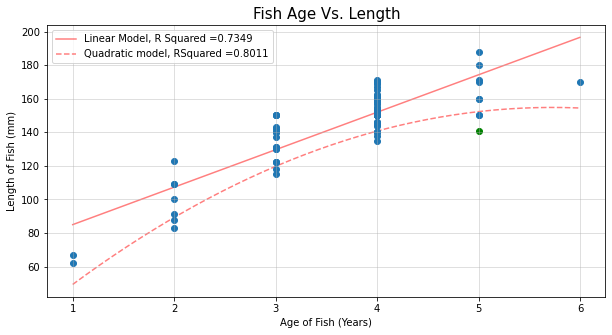

In [2]:
#Problem 1----------------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fishdata = pd.read_csv('fish.txt', sep= '\t')
fishdata = fishdata.values

age = fishdata[:,0]
length = fishdata[:,1]

plt.figure(figsize=(500/50,500/100))
plt.grid(True, alpha=0.5)
plt.xticks([1,2,3,4,5,6])
plt.xlabel('Age of Fish (Years)')
plt.yticks([0,20,40,60,80,100,120,140,160,180,200])
plt.ylabel('Length of Fish (mm)')
plt.title('Fish Age Vs. Length', fontsize=15)
z=-900
plt.scatter(age,length, zorder = z)


def RSquared(real, predict):
    error = ((predict - real)**2).sum()
    mean = error/len(real)
    return 1 - (mean/np.var(real))
    

#Problem 2-----------------------------------------------------------------------

linmod = np.polyfit(age, length, 1)
a, b = linmod[0], linmod[1]
yp = np.polyval(linmod, age)
rsq = RSquared(length, yp)

def BestF(x, a=a, b=b):
    return a*x+b

x1 = [min(age), max(age)]
y1 = [BestF(min(age)), BestF(max(age))]
lab = 'Linear Model, R Squared =' + str(round(rsq, 4))
plt.plot(x1, y1, 'r-', label=lab, alpha=0.5, zorder=z-1)



qmod = np.polyfit(age, length, 2)
yp = np.polyval(qmod, age)
a, b = qmod[0], qmod[1]
rsq = RSquared(length, yp)

def BestFQ(x, a=a, b=b):
    return a*(x**2)+b*x

x1 = np.linspace(min(age), max(age), 150)
y1 = []

for x in x1:
    y1.append(BestFQ(x))
lab = 'Quadratic model, RSquared =' + str(round(rsq, 4))
plt.plot(x1, y1, 'r--', label=lab, alpha=0.5, zorder=z-2)


#Problem 3-----------------------------------------------------------------------

plt.scatter(5, BestFQ(4), c='g')

plt.legend(loc='best')
plt.show




---------------------------------------------PROBLEM 3 QUESTIONS:--------------------------------------------------------------

The length of a randomly selected 5-year-old bluegill is 140 millimeters. 

As for my prediction, I think I was pretty accurate. Both R^2 values are above 0.7, and with the quadratic model it goes as high as 0.8. With these values in mind, we can confidently say that the models accurately explain the majority of our data in the set.

	Root Mean Square Error (RMSE)= 0.6381156729144055


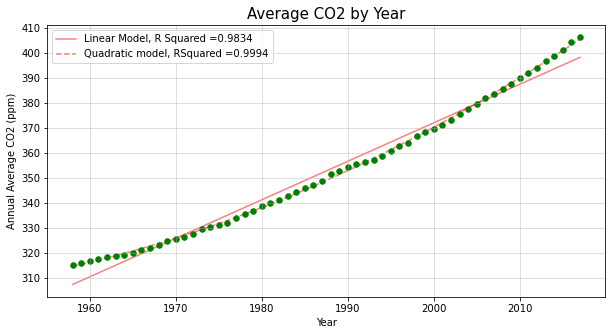

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#Problem 4------------------------------------------------------------------------------

file = open('co2years.csv','r')

co2 = []
for line in file.readlines():
    ln = line.replace('\n','').split(',')
    try:
        co2.append([int(ln[0]), float(ln[1])])
    except:
        pass
    
year = []
ppm = []

for ln in range(len(co2)):
    year.append(co2[ln][0])
    ppm.append(co2[ln][1])

xt=[1950,1960,1970,1980,1990,2000,2010,2020]
yt=[310,320,330,340,350,360,370,380,390,400,410]
plt.figure(figsize=(500/50,500/100))
plt.grid(True, alpha=0.5)
plt.rcParams['axes.axisbelow'] = True
plt.xticks(xt)
plt.xlabel('Year')
plt.yticks(yt)
plt.ylabel('Annual Average CO2 (ppm)')
plt.title('Average CO2 by Year', fontsize=15)
z=-900

for i in range(len(co2)): 
    plt.scatter(co2[i][0], co2[i][1], s=30, c='g', zorder = z)
    
    
#Problem 5-------------------------------------------------------------------------------

linmod = np.polyfit(year, ppm, 1)
a, b = linmod[0], linmod[1]
yp = np.polyval(linmod, year)
rsq = RSquared(ppm, yp)

def BestF(x, a=a, b=b):
    return a*x+b

x1 = [min(year), max(year)]
y1 = [BestF(min(year)), BestF(max(year))]
lab = 'Linear Model, R Squared =' + str(round(rsq, 4))
plt.plot(x1, y1, 'r-', label=lab, alpha=0.5, zorder=z-1)


qmod = np.polyfit(year, ppm, 2)
yp = np.polyval(qmod, year)
a, b, c = qmod[0], qmod[1], qmod[2]
rsq = RSquared(ppm, yp)

def BestFQ(x, a=a, b=b):
    return a*(x**2)+b*x+c

x1 = np.linspace(min(year), max(year), 200)
y1 = []

for x in x1:
    y1.append(BestFQ(x))
lab = 'Quadratic model, RSquared =' + str(round(rsq, 4))
plt.plot(x1, y1, 'r--', label=lab, alpha=0.5, zorder=z-2)

print('\tRoot Mean Square Error (RMSE)=', rmse(ppm,yp))


#Problem 6-----------------------------------------------------------------------------------



plt.legend(loc = 'best')
plt.show()

In [4]:
#Problem 6-----------------------------------------------------------------------

import random



def splitData(xVals, yVals):
    toTrain = random.sample(range(len(xVals)),
                            len(xVals)//2)
    trainX, trainY, testX, testY = [],[],[],[]
    for i in range(len(xVals)):
        if i in toTrain:
            trainX.append(xVals[i])
            trainY.append(yVals[i])
        else:
            testX.append(xVals[i])
            testY.append(yVals[i])
    return trainX, trainY, testX, testY


def Trials(trials):
    numSubsets = 10
    dimensions = (1, 2, 3, 4)
    rSquares = {}
    for d in dimensions:
        rSquares[d] = []

    for f in range(numSubsets):
        trainX, trainY, testX, testY = splitData(year, ppm)
        for d in dimensions:
            model = np.polyfit(trainX, trainY, d)
            estYVals = np.polyval(model, testX)
            rSquares[d].append(RSquared(testY, estYVals))
    print('Mean R-squares for test data')
    for d in dimensions:
        mean = round(sum(rSquares[d])/len(rSquares[d]), 4)
        sd = round(np.std(rSquares[d]), 4)
        print('For dimensionality', d, 'mean =', mean,
              'Std =', sd)
    
print('10 Trials: ')
Trials(10)
print('\n')
print('100 Trials: ')
Trials(100)
print('\n')

10 Trials: 
Mean R-squares for test data
For dimensionality 1 mean = 0.9801 Std = 0.0042
For dimensionality 2 mean = 0.9993 Std = 0.0002
For dimensionality 3 mean = 0.9992 Std = 0.0002
For dimensionality 4 mean = 0.9994 Std = 0.0005


100 Trials: 
Mean R-squares for test data
For dimensionality 1 mean = 0.9785 Std = 0.0033
For dimensionality 2 mean = 0.9993 Std = 0.0001
For dimensionality 3 mean = 0.9992 Std = 0.0001
For dimensionality 4 mean = 0.9996 Std = 0.0001




-------------------------------------------------PROBLEM 6 QUESTIONS:------------------------------------------------------

I think the historical data can predict future carbon dioxide levels fairly accurately. Obviously it could not be 100% accurate, especially with something that could change depending on a multitude of variables like CO2 levels, but the models can come fairly close. The regression lines in the models, especially the quadratic lines, were able to track the levels of CO2 very accurately, with the line of best fit almost lining up perfectly with the data points on the graph. The RMSE value from the quadratic model came in at 0.64, which means the model predicted the data accurately. 

# Turn-in
You need to turn in at least two files for your submission:

* Your notebook file that contains the code and presentation.
* You need to run all you cells and present the results in the notebook document or download the file as a PDF using the File menu in Jupyter Notebook.
* Data files used in this document (so that I can run your code cells)
* Any other supplementary documents you want to submit to D2L Assignments folder 

You need to package the files into a zip archive and upload the zip file to D2L assignment folder <b>Assignment 5</b>

